# Fourier Decomposition in Python Using SciPy

From <a href ="https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html">here</a>.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

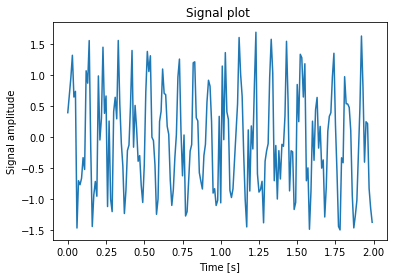

In [2]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
signal_vals = np.sin(f * 2 * np.pi * t) + np.random.normal(0,0.5, (2 * f_s))

fig, ax = plt.subplots()
ax.plot(t, signal_vals )
plt.title("Signal plot ")
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

/home/greg/Desktop/virtual_environments/standard_env/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


(-5, 110)

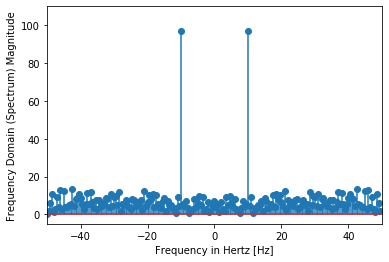

In [3]:
from scipy import fftpack

f_s = 100 # Sampling rate

# signal_values = # set signal vals

signal_vals_fft = fftpack.fft(signal_vals)
freqs = fftpack.fftfreq(len(signal_vals)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(signal_vals_fft))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [8]:
power = np.abs(signal_vals_fft)


sorted_power = np.argsort(power)[::-1][::2]


In [9]:
first_n = 4

included_terms = sorted_power[0:first_n]
print(power[included_terms])
included_frequencies = freqs[included_terms]

print(included_frequencies)

[96.80085371 13.36504001 12.99496615 12.48023759]
[-10.  -42.5 -46.  -45. ]


## Curve Fitting Version

In [10]:
#t = 
#signal_vals = 
freqs = included_frequencies
order = 2
inits = None

In [11]:
if inits == None:
    inits = np.random.normal(0,2, 2*order - 1)
        
if 0.0 not in freqs:
        
    freqs = [0.0] + list(freqs)
        
var_string = ""

for i in range(order):
    if i==0:
        var_string += "a_{} ".format(i)
    else:
        var_string += ", a_{}, b_{} ".format(i, i)
        
for i in range(order):
    
    if i == 0:
        fourier_string = "a_{} * np.cos(2 * np.pi * {} * t)".format(i, freqs[i])
    else:
        fourier_string += " + a_{} * np.cos(2 * np.pi * {} * t) + b_{} * np.sin(2 * np.pi * {} * t)".format(i, freqs[i], i, freqs[i])
        
exec("""def fourier_function(t, {}):
            fourier_output = {}
            return fourier_output""".format(var_string, fourier_string))

params, params_covariance = optimize.curve_fit(fourier_function, t, signal_vals,
                                               p0=inits)

## Discrete Version

In [85]:
class FourierModel:
    
    """
    Models a time series with a Fourier series.
    
    Provides functionality to choose the order of the Fourier series
    and to use it to predict future or past values.
    """
    
    def __init__(self, period, fourier_order):
        
        """
        Initialise Fourier model.
        
        
        Inputs
        ------
        period (int): Period of signal in time steps.
        fourier_order (int): Order of desired Fourier series.
    
    
        Returns
        -------
        """
        
        self.period = period
        self.fourier_order = fourier_order
        self.full_cycle = None
        self.train_length = None
        
    def fit(self, signal_vals):
        
        self.train_length = len(signal_vals)
        
        signal_mean = np.mean(signal_vals)
        signal_vals_fft = fftpack.fft(signal_vals)

        ordered_power = np.argsort(signal_vals_fft)[::-1][::2][:self.fourier_order]
        threshold = np.min(np.abs(ordered_power))
        signal_vals_fft[np.abs(signal_vals_fft) < threshold] = 0.0

        ifft = np.fft.ifft(signal_vals_fft) + signal_mean
        self.full_cycle = np.real(ifft[:self.period])
        
    def forecast(self, start, end):
        
        forecasting_times = np.arange(start, end) % self.period
        forecast_vals = [self.full_cycle[idx] for idx in forecasting_times]
        
        return forecast_vals

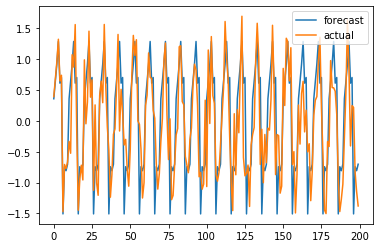

In [84]:
fourier_model = FourierModel(10, 200)
fourier_model.fit(signal_vals)
plt.plot(fourier_model.forecast(0,200), label = "forecast")
plt.plot(signal_vals, label = "actual")
plt.legend()